# Project 1 Starter Notebook

This notebook is meant to help you start up easily.
It will assume you have downloaded the relevant data.
For more information about the competition, refer to the kaggle pages.

Let's load in and inspect all data first:

In [1]:
import pandas as pd
import numpy as np
import datetime

# read in data
bicycle_data_2021 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2021-gent.csv", sep = ";")
bicycle_data_2022 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2022-gent.csv", sep = ";")
bicycle_data_2023 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2023-gent.csv", sep = ";")
bicycle_data = pd.concat([bicycle_data_2021, bicycle_data_2022, bicycle_data_2023])
bicycle_data["Date_hour"] = bicycle_data['Ordening'].str.extract(r'^(.*?T\d{2})..')
bicycle_data = bicycle_data.groupby(['Datum', 'Date_hour'])['Totaal'].sum().reset_index(name ='Totaal')
print(bicycle_data.shape)
print(min(bicycle_data["Date_hour"]))
print(max(bicycle_data["Date_hour"]))
bicycle_data.head()

(21189, 3)
2021-03-01T00
2023-07-31T23


,Datum,Date_hour,Totaal
0,2021-03-01,2021-03-01T00,5.0
1,2021-03-01,2021-03-01T01,1.0
2,2021-03-01,2021-03-01T02,0.0
3,2021-03-01,2021-03-01T03,2.0
4,2021-03-01,2021-03-01T04,21.0


In [2]:
train_rawdata = pd.read_csv("input/bicycle-counter-prediction/train_data.csv")
print(train_rawdata.shape)
print(min(train_rawdata["Date_hour"]))
print(max(train_rawdata["Date_hour"]))
train_rawdata.head()

(4343, 2)
2023-01-01T00
2023-06-30T23


,Date_hour,Totaal
0,2023-01-01T00,111.0
1,2023-01-01T01,201.0
2,2023-01-01T02,170.0
3,2023-01-01T03,144.0
4,2023-01-01T04,155.0


In [3]:
test_rawdata = pd.read_csv("input/bicycle-counter-prediction/test_data.csv")
print(test_rawdata.shape)
print(min(test_rawdata["Date_hour"]))
print(max(test_rawdata["Date_hour"]))
test_rawdata.head()

(744, 2)
2023-07-01T00
2023-07-31T23


,Id,Date_hour
0,0,2023-07-01T00
1,1,2023-07-01T01
2,2,2023-07-01T02
3,3,2023-07-01T03
4,4,2023-07-01T04


In [4]:
# read in data
weather_rawdata = pd.read_csv("input/bicycle-counter-prediction/open-meteo-51.10N3.70E13m.csv", skiprows=2).dropna()
print(weather_rawdata.shape)
print(weather_rawdata.isna().sum())
weather_rawdata.head()

(33024, 7)
time                         0
temperature_2m (°C)          0
apparent_temperature (°C)    0
precipitation (mm)           0
weathercode (wmo code)       0
cloudcover (%)               0
is_day ()                    0
dtype: int64


,time,temperature_2m (°C),apparent_temperature (°C),precipitation (mm),weathercode (wmo code),cloudcover (%),is_day ()
0,2020-01-01T00:00,3.3,-0.1,0.0,1.0,44.0,0
1,2020-01-01T01:00,2.8,-0.6,0.0,0.0,17.0,0
2,2020-01-01T02:00,2.5,-1.0,0.0,0.0,10.0,0
3,2020-01-01T03:00,1.9,-1.6,0.0,0.0,3.0,0
4,2020-01-01T04:00,1.4,-2.2,0.0,0.0,0.0,0


In [5]:
school_holidays_data = pd.read_csv("input/bicycle-counter-prediction/school_holidays.csv", sep = ";")
school_holidays_data.head()

,name,start,end
0,Christmas holiday 2020,2020-12-21,2021-01-03
1,Spring break 2021,2021-02-15,2021-02-21
2,Easter holiday 2021,2021-04-05,2021-04-18
3,Summer holiday 2021,2021-07-01,2021-08-31
4,Autumn break 2021,2021-11-01,2021-11-07


In [6]:
import holidays
belgian_holidays = holidays.Belgium(years=[2021, 2022, 2023])
print(belgian_holidays)

{datetime.date(2021, 1, 1): 'Nieuwjaar', datetime.date(2021, 4, 4): 'Pasen', datetime.date(2021, 4, 5): 'Paasmaandag', datetime.date(2021, 5, 1): 'Dag van de Arbeid', datetime.date(2021, 5, 13): 'O. L. H. Hemelvaart', datetime.date(2021, 5, 23): 'Pinksteren', datetime.date(2021, 5, 24): 'Pinkstermaandag', datetime.date(2021, 7, 21): 'Nationale feestdag', datetime.date(2021, 8, 15): 'O. L. V. Hemelvaart', datetime.date(2021, 11, 1): 'Allerheiligen', datetime.date(2021, 11, 11): 'Wapenstilstand', datetime.date(2021, 12, 25): 'Kerstmis', datetime.date(2022, 1, 1): 'Nieuwjaar', datetime.date(2022, 4, 17): 'Pasen', datetime.date(2022, 4, 18): 'Paasmaandag', datetime.date(2022, 5, 1): 'Dag van de Arbeid', datetime.date(2022, 5, 26): 'O. L. H. Hemelvaart', datetime.date(2022, 6, 5): 'Pinksteren', datetime.date(2022, 6, 6): 'Pinkstermaandag', datetime.date(2022, 7, 21): 'Nationale feestdag', datetime.date(2022, 8, 15): 'O. L. V. Hemelvaart', datetime.date(2022, 11, 1): 'Allerheiligen', datetim

In [7]:
import datetime
school_holidays = {}
for index, row in school_holidays_data.iterrows():
    school_holidays[row['name']] = [datetime.datetime.strptime(row['start'], '%Y-%m-%d'), datetime.datetime.strptime(row['end'], '%Y-%m-%d')]
print(school_holidays)

{'Christmas holiday 2020': [datetime.datetime(2020, 12, 21, 0, 0), datetime.datetime(2021, 1, 3, 0, 0)], 'Spring break 2021': [datetime.datetime(2021, 2, 15, 0, 0), datetime.datetime(2021, 2, 21, 0, 0)], 'Easter holiday 2021': [datetime.datetime(2021, 4, 5, 0, 0), datetime.datetime(2021, 4, 18, 0, 0)], 'Summer holiday 2021': [datetime.datetime(2021, 7, 1, 0, 0), datetime.datetime(2021, 8, 31, 0, 0)], 'Autumn break 2021': [datetime.datetime(2021, 11, 1, 0, 0), datetime.datetime(2021, 11, 7, 0, 0)], 'Christmas holiday 2021': [datetime.datetime(2021, 12, 27, 0, 0), datetime.datetime(2022, 1, 9, 0, 0)], 'Spring break 2022': [datetime.datetime(2022, 2, 28, 0, 0), datetime.datetime(2022, 3, 6, 0, 0)], 'Easter holiday 2022': [datetime.datetime(2022, 4, 4, 0, 0), datetime.datetime(2022, 4, 18, 0, 0)], 'Summer holiday 2022': [datetime.datetime(2022, 7, 1, 0, 0), datetime.datetime(2022, 8, 31, 0, 0)], 'Autumn break 2022': [datetime.datetime(2022, 10, 31, 0, 0), datetime.datetime(2022, 11, 6, 0, 

The weather data downloaded from open meteo carries times in a slightly different format than the bicycle counter data.
Note that you are encouraged to create and download your own weather data with more features.
The following code converts this data:

In [8]:
from datetime import timedelta

weather_data = weather_rawdata.copy()
weather_data.columns = weather_data.columns.str.split(' ').str[0]
weather_data["Date_hour"] = weather_data["time"].str.split(':', expand = True)[0]
weather_data = weather_data.drop("time", axis = 1)
weather_data = weather_data[(min(bicycle_data["Date_hour"]) <= weather_data['Date_hour']) & (weather_data['Date_hour'] <= max(test_rawdata["Date_hour"]))]
date_time = pd.to_datetime(weather_data['Date_hour'])
weather_data["date"] = date_time.dt.date

print(weather_data.shape)
print(min(weather_data["Date_hour"]))
print(max(weather_data["Date_hour"]))
weather_data.head()

(21192, 8)
2021-03-01T00
2023-07-31T23


,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,date
10200,4.0,0.9,0.0,0.0,0.0,0,2021-03-01T00,2021-03-01
10201,3.6,0.5,0.0,0.0,0.0,0,2021-03-01T01,2021-03-01
10202,3.2,0.1,0.0,0.0,0.0,0,2021-03-01T02,2021-03-01
10203,2.9,-0.4,0.0,0.0,0.0,0,2021-03-01T03,2021-03-01
10204,2.6,-0.8,0.0,0.0,0.0,0,2021-03-01T04,2021-03-01


### Feature engineering

In [9]:
feature_data = weather_data.copy()
feature_data['weekday'] = date_time.dt.strftime('%A')
feature_data['hour'] = date_time.dt.hour
feature_data["month"] = date_time.dt.month
feature_data['hour_sin'] = np.sin(2 * np.pi * feature_data['hour'] / 24)
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'
feature_data['season'] = feature_data['date'].apply(get_season)
feature_data['next_day'] = date_time + timedelta(days=1)
feature_data['prev_day'] = date_time - timedelta(days=1)
print(feature_data.shape)
feature_data.head()

(21192, 15)


,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,date,weekday,hour,month,hour_sin,season,next_day,prev_day
10200,4.0,0.9,0.0,0.0,0.0,0,2021-03-01T00,2021-03-01,Monday,0,3,0.000000,Spring,2021-03-02 00:00:00,2021-02-28 00:00:00
10201,3.6,0.5,0.0,0.0,0.0,0,2021-03-01T01,2021-03-01,Monday,1,3,0.258819,Spring,2021-03-02 01:00:00,2021-02-28 01:00:00
10202,3.2,0.1,0.0,0.0,0.0,0,2021-03-01T02,2021-03-01,Monday,2,3,0.500000,Spring,2021-03-02 02:00:00,2021-02-28 02:00:00
10203,2.9,-0.4,0.0,0.0,0.0,0,2021-03-01T03,2021-03-01,Monday,3,3,0.707107,Spring,2021-03-02 03:00:00,2021-02-28 03:00:00
10204,2.6,-0.8,0.0,0.0,0.0,0,2021-03-01T04,2021-03-01,Monday,4,3,0.866025,Spring,2021-03-02 04:00:00,2021-02-28 04:00:00


In [10]:
feature_data['is_school_hours'] = ((date_time.dt.hour >= 8) & (date_time.dt.hour <= 17)).astype(int)
feature_data['is_weekend'] = (feature_data['weekday'].isin(["Saturday", "Sunday"])).astype(int)
feature_data['is_university_lessons'] = (weather_data["Date_hour"].apply(lambda dt:('02-13' <= dt <= '04-01') or ('04-17' <= dt <= '05-20'))).astype(int)
feature_data['is_Ghent_event'] = (weather_data["Date_hour"].apply(lambda dt:('07-14' <= dt <= '07-23'))).astype(int)

print(feature_data.shape)
feature_data.head()

(21192, 19)


,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,date,weekday,hour,month,hour_sin,season,next_day,prev_day,is_school_hours,is_weekend,is_university_lessons,is_Ghent_event
10200,4.0,0.9,0.0,0.0,0.0,0,2021-03-01T00,2021-03-01,Monday,0,3,0.000000,Spring,2021-03-02 00:00:00,2021-02-28 00:00:00,0,0,0,0
10201,3.6,0.5,0.0,0.0,0.0,0,2021-03-01T01,2021-03-01,Monday,1,3,0.258819,Spring,2021-03-02 01:00:00,2021-02-28 01:00:00,0,0,0,0
10202,3.2,0.1,0.0,0.0,0.0,0,2021-03-01T02,2021-03-01,Monday,2,3,0.500000,Spring,2021-03-02 02:00:00,2021-02-28 02:00:00,0,0,0,0
10203,2.9,-0.4,0.0,0.0,0.0,0,2021-03-01T03,2021-03-01,Monday,3,3,0.707107,Spring,2021-03-02 03:00:00,2021-02-28 03:00:00,0,0,0,0
10204,2.6,-0.8,0.0,0.0,0.0,0,2021-03-01T04,2021-03-01,Monday,4,3,0.866025,Spring,2021-03-02 04:00:00,2021-02-28 04:00:00,0,0,0,0


In [11]:
feature_data['is_public_holiday'] = (date_time.dt.date.isin(belgian_holidays)).astype(int)
feature_data['is_bridge_day'] = (feature_data['weekday'].isin(["Monday", "Friday"]) & feature_data['next_day'].dt.date.isin(belgian_holidays) | feature_data['prev_day'].dt.date.isin(belgian_holidays)).astype(int)
is_school_holiday = [0] * len(date_time)
for i, check_date in enumerate(date_time):
    for holiday, date_range in school_holidays.items():
        start_date = date_range[0]
        end_date = date_range[1]
        if start_date <= check_date <= end_date:
            is_school_holiday[i] = 1
feature_data["is_school_holiday"] = is_school_holiday
print(feature_data.shape)
feature_data.head()

(21192, 22)


,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,date,weekday,hour,...,season,next_day,prev_day,is_school_hours,is_weekend,is_university_lessons,is_Ghent_event,is_public_holiday,is_bridge_day,is_school_holiday
10200,4.0,0.9,0.0,0.0,0.0,0,2021-03-01T00,2021-03-01,Monday,0,...,Spring,2021-03-02 00:00:00,2021-02-28 00:00:00,0,0,0,0,0,0,0
10201,3.6,0.5,0.0,0.0,0.0,0,2021-03-01T01,2021-03-01,Monday,1,...,Spring,2021-03-02 01:00:00,2021-02-28 01:00:00,0,0,0,0,0,0,0
10202,3.2,0.1,0.0,0.0,0.0,0,2021-03-01T02,2021-03-01,Monday,2,...,Spring,2021-03-02 02:00:00,2021-02-28 02:00:00,0,0,0,0,0,0,0
10203,2.9,-0.4,0.0,0.0,0.0,0,2021-03-01T03,2021-03-01,Monday,3,...,Spring,2021-03-02 03:00:00,2021-02-28 03:00:00,0,0,0,0,0,0,0
10204,2.6,-0.8,0.0,0.0,0.0,0,2021-03-01T04,2021-03-01,Monday,4,...,Spring,2021-03-02 04:00:00,2021-02-28 04:00:00,0,0,0,0,0,0,0


In [12]:
dummies = pd.concat([pd.get_dummies(feature_data.weekday), pd.get_dummies(feature_data.season)], axis = 1)
dummies.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter
10200,0,1,0,0,0,0,0,0,1,0,0
10201,0,1,0,0,0,0,0,0,1,0,0
10202,0,1,0,0,0,0,0,0,1,0,0
10203,0,1,0,0,0,0,0,0,1,0,0
10204,0,1,0,0,0,0,0,0,1,0,0


In [13]:
feature_data = pd.concat([feature_data, dummies], axis=1)
print(feature_data.shape)
feature_data.head()

(21192, 33)


,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,date,weekday,hour,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter
10200,4.0,0.9,0.0,0.0,0.0,0,2021-03-01T00,2021-03-01,Monday,0,...,1,0,0,0,0,0,0,1,0,0
10201,3.6,0.5,0.0,0.0,0.0,0,2021-03-01T01,2021-03-01,Monday,1,...,1,0,0,0,0,0,0,1,0,0
10202,3.2,0.1,0.0,0.0,0.0,0,2021-03-01T02,2021-03-01,Monday,2,...,1,0,0,0,0,0,0,1,0,0
10203,2.9,-0.4,0.0,0.0,0.0,0,2021-03-01T03,2021-03-01,Monday,3,...,1,0,0,0,0,0,0,1,0,0
10204,2.6,-0.8,0.0,0.0,0.0,0,2021-03-01T04,2021-03-01,Monday,4,...,1,0,0,0,0,0,0,1,0,0


The following code merges the bicycle data with the weather data to get a train set:

In [14]:
all_data = feature_data.merge(bicycle_data, on = "Date_hour")
train_data = all_data[all_data["Date_hour"] < min(test_rawdata["Date_hour"])]
print(train_data.shape)
print(min(train_data["Date_hour"]))
print(max(train_data["Date_hour"]))
train_data.head()

(20445, 35)
2021-03-01T00
2023-06-30T23


,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,date,weekday,hour,...,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter,Datum,Totaal
0,4.0,0.9,0.0,0.0,0.0,0,2021-03-01T00,2021-03-01,Monday,0,...,0,0,0,0,0,1,0,0,2021-03-01,5.0
1,3.6,0.5,0.0,0.0,0.0,0,2021-03-01T01,2021-03-01,Monday,1,...,0,0,0,0,0,1,0,0,2021-03-01,1.0
2,3.2,0.1,0.0,0.0,0.0,0,2021-03-01T02,2021-03-01,Monday,2,...,0,0,0,0,0,1,0,0,2021-03-01,0.0
3,2.9,-0.4,0.0,0.0,0.0,0,2021-03-01T03,2021-03-01,Monday,3,...,0,0,0,0,0,1,0,0,2021-03-01,2.0
4,2.6,-0.8,0.0,0.0,0.0,0,2021-03-01T04,2021-03-01,Monday,4,...,0,0,0,0,0,1,0,0,2021-03-01,21.0


In [15]:
bicycle_data_2022["Date_hour"] = bicycle_data_2022['Ordening'].str.extract(r'^(.*?T\d{2})..')
bicycle_data_2022 = bicycle_data_2022.groupby(['Datum', 'Date_hour'])['Totaal'].sum().reset_index(name ='Totaal')
print(bicycle_data_2022.shape)
bicycle_data_2022.head()

(8759, 3)


,Datum,Date_hour,Totaal
0,2022-01-01,2022-01-01T00,30
1,2022-01-01,2022-01-01T01,110
2,2022-01-01,2022-01-01T02,117
3,2022-01-01,2022-01-01T03,148
4,2022-01-01,2022-01-01T04,150


In [16]:
train_data_orig = train_rawdata.merge(feature_data, on = "Date_hour", how = 'left')
train_data_orig["Totaal_2022"] = bicycle_data_2022[("2022-01-01" <= bicycle_data_2022["Datum"]) & (bicycle_data_2022["Datum"] <= "2022-06-30")]["Totaal"]
print(train_data_orig.shape)
train_data_orig.head()

(4343, 35)


,Date_hour,Totaal,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,date,weekday,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter,Totaal_2022
0,2023-01-01T00,111.0,15.8,9.3,0.0,3.0,86.0,0,2023-01-01,Sunday,...,0,1,0,0,0,0,0,0,1,30
1,2023-01-01T01,201.0,15.3,8.9,0.0,3.0,80.0,0,2023-01-01,Sunday,...,0,1,0,0,0,0,0,0,1,110
2,2023-01-01T02,170.0,14.7,8.8,0.0,2.0,70.0,0,2023-01-01,Sunday,...,0,1,0,0,0,0,0,0,1,117
3,2023-01-01T03,144.0,14.3,9.0,0.0,3.0,99.0,0,2023-01-01,Sunday,...,0,1,0,0,0,0,0,0,1,148
4,2023-01-01T04,155.0,13.8,9.3,0.0,2.0,70.0,0,2023-01-01,Sunday,...,0,1,0,0,0,0,0,0,1,150


In [17]:
train_data_summer = train_data[(train_data["month"] <= 8) & (train_data["month"] >= 7)]
print(train_data_summer.shape)
train_data_summer.head()

(2976, 35)


,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,date,weekday,hour,...,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter,Datum,Totaal
2927,13.7,12.6,0.0,3.0,100.0,0,2021-07-01T00,2021-07-01,Thursday,0,...,0,1,0,0,0,0,1,0,2021-07-01,82.0
2928,13.6,12.5,0.0,3.0,100.0,0,2021-07-01T01,2021-07-01,Thursday,1,...,0,1,0,0,0,0,1,0,2021-07-01,59.0
2929,13.5,12.2,0.0,3.0,100.0,0,2021-07-01T02,2021-07-01,Thursday,2,...,0,1,0,0,0,0,1,0,2021-07-01,24.0
2930,13.3,11.8,0.0,3.0,100.0,0,2021-07-01T03,2021-07-01,Thursday,3,...,0,1,0,0,0,0,1,0,2021-07-01,18.0
2931,13.1,11.7,0.0,3.0,100.0,1,2021-07-01T04,2021-07-01,Thursday,4,...,0,1,0,0,0,0,1,0,2021-07-01,42.0


The following does the same but then for the test set:

In [18]:
test_data = test_rawdata.merge(feature_data, on = "Date_hour", how = 'left')#.drop("Id", axis = 1)
Totaal_2022 = bicycle_data_2022[("2022-07-01" <= bicycle_data_2022["Datum"]) & (bicycle_data_2022["Datum"] <= "2022-07-31")]["Totaal"].reset_index(drop=True)
test_data["Totaal_2022"] = Totaal_2022
print(test_data.shape)
test_data.head()

(744, 35)


,Id,Date_hour,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,date,weekday,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter,Totaal_2022
0,0,2023-07-01T00,18.0,15.7,0.0,3.0,100.0,0,2023-07-01,Saturday,...,1,0,0,0,0,0,0,1,0,96
1,1,2023-07-01T01,17.7,15.3,0.0,3.0,100.0,0,2023-07-01,Saturday,...,1,0,0,0,0,0,0,1,0,41
2,2,2023-07-01T02,17.4,15.0,0.0,3.0,100.0,0,2023-07-01,Saturday,...,1,0,0,0,0,0,0,1,0,17
3,3,2023-07-01T03,17.2,15.0,0.0,3.0,100.0,0,2023-07-01,Saturday,...,1,0,0,0,0,0,0,1,0,49
4,4,2023-07-01T04,17.1,15.3,0.0,3.0,100.0,1,2023-07-01,Saturday,...,1,0,0,0,0,0,0,1,0,37


In [19]:
gtest_data = test_rawdata.merge(bicycle_data[["Totaal", "Date_hour"]], on = "Date_hour", how = 'left')
print(gtest_data.shape)
gtest_data.head()

(744, 3)


,Id,Date_hour,Totaal
0,0,2023-07-01T00,150.0
1,1,2023-07-01T01,92.0
2,2,2023-07-01T02,49.0
3,3,2023-07-01T03,36.0
4,4,2023-07-01T04,57.0


## Preprocessing and setup

### Feature Selection

In [20]:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
season = ["Winter", "Fall", "Spring", "Summer"]
chosen_features = ['temperature_2m', 'is_day', 'is_weekend', 'hour_sin', 'is_public_holiday', 'is_school_holiday', 'is_school_hours']

In [21]:
all_features = list(train_data.select_dtypes(include='number').columns)
all_features.remove("Totaal")
print(all_features)

['temperature_2m', 'apparent_temperature', 'precipitation', 'weathercode', 'cloudcover', 'is_day', 'hour', 'month', 'hour_sin', 'is_school_hours', 'is_weekend', 'is_university_lessons', 'is_Ghent_event', 'is_public_holiday', 'is_bridge_day', 'is_school_holiday', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Fall', 'Spring', 'Summer', 'Winter']


In [22]:
orig_features = list(train_data_orig.select_dtypes(include='number').columns)
orig_features.remove("Totaal")
print(orig_features)

['temperature_2m', 'apparent_temperature', 'precipitation', 'weathercode', 'cloudcover', 'is_day', 'hour', 'month', 'hour_sin', 'is_school_hours', 'is_weekend', 'is_university_lessons', 'is_Ghent_event', 'is_public_holiday', 'is_bridge_day', 'is_school_holiday', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Fall', 'Spring', 'Summer', 'Winter', 'Totaal_2022']


### Pairwise Plot

In [23]:
# import seaborn as sns

# plot_features = ['temperature_2m', 'is_day', 'is_weekend', 'hour', 'is_public_holiday', 'is_school_holiday', 'is_school_hours']
# sns.pairplot(all_data.loc[:,plot_features + ['Totaal']])

### Functions

In [24]:
# Function to compute MSE
def compute_MSE(y_true, y_predicted):
    """Obtain MSE between true y's and predicted y's"""
    return(np.mean((y_true-y_predicted)**2))

In [25]:
import matplotlib.pyplot as plt

def plot_diff(y_train, y_hat_train, y_test, y_hat_test):
    y_test_reset = y_test.reset_index()
    indices = y_test_reset.index.to_list()
    time = np.divide(indices, max(indices))*31
    logdiff_test = np.log10(y_hat_test - y_test)

    plt.plot(time, logdiff_test, 'bo')
    plt.xlabel('Day')
    plt.ylabel('log10(y_hat_test - y_test)')
    plt.grid(True)
    plt.show()

    y_train_reset = y_train.reset_index()
    indices = y_train_reset.index.to_list()
    time = np.divide(indices, max(indices))*6+1
    logdiff_train = np.log10(y_hat_train - y_train)

    plt.plot(time, logdiff_train, 'bo')
    plt.xlabel('Month')
    plt.ylabel('log10(y_hat_train - y_train)')
    plt.grid(True)
    plt.show()

In [26]:
def save_predictions(model, test_data, y_hat_test):
    file = pd.DataFrame([test_data.loc[:, "Id"], y_hat_test]).T
    file.columns = ["Id", "Predicted"]
    file.to_csv("input/bicycle-counter-prediction/predictions/" + model + ".csv", index = False)

## Models

### Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

LinReg = make_pipeline(StandardScaler(), SelectFromModel(Ridge()), LinearRegression()) # call an instance of the class LinearRegression

LinReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = LinReg.predict(X_train) # predict training data

y_hat_test = LinReg.predict(X_test) # predict test data

R_train = LinReg.score(X_train, y_train) # Training set R²
R_test = LinReg.score(X_test, y_test) # Test set R²

best_features = X_train.columns[LinReg.named_steps['selectfrommodel'].get_support()]

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print('Best features: {}'.format(best_features))

Train set R²: 0.45498925857628836
Test set R²: 0.4750988615948152
Best features: Index(['apparent_temperature', 'is_day', 'hour', 'hour_sin', 'is_school_hours',
       'is_weekend', 'is_school_holiday', 'Sunday', 'Fall'],
      dtype='object')


### Poisson Regression

In [103]:
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

PoiReg = make_pipeline(StandardScaler(), SelectFromModel(Ridge()), PoissonRegressor()) # call an instance of the class LinearRegression

PoiReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = PoiReg.predict(X_train) # predict training data

y_hat_test = PoiReg.predict(X_test) # predict test data

R_train = r2_score(y_train, y_hat_train) # Training set R²
R_test = r2_score(y_test, y_hat_test) # Test set R²

best_features = X_train.columns[PoiReg.named_steps['selectfrommodel'].get_support()]

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print('Best features: {}'.format(best_features))

Train set R²: 0.46528785091163793
Test set R²: 0.5348978763061184
Best features: Index(['apparent_temperature', 'is_day', 'hour', 'hour_sin', 'is_school_hours',
       'is_weekend', 'is_school_holiday', 'Sunday', 'Fall'],
      dtype='object')


### Negative binomial regression

In [102]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

formula = 'Totaal ~ temperature_2m * is_day * hour_sin + is_weekend + is_public_holiday + is_school_holiday + is_school_hours' 

# Create the model
NBReg = smf.glm(formula=formula, data=train_data, family=sm.families.NegativeBinomial())

results = NBReg.fit()

y_hat_train = results.predict(X_train) # predict training data

y_hat_test = results.predict(X_test) # predict test data

R_train = r2_score(y_train, y_hat_train) # Training set R²
R_test = r2_score(y_test, y_hat_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

print(results.summary())


Train set R²: 0.5100695545527163
Test set R²: 0.5527065967355017
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Totaal   No. Observations:                20445
Model:                            GLM   Df Residuals:                    20433
Model Family:        NegativeBinomial   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2997e+05
Date:                Sat, 21 Oct 2023   Deviance:                       14120.
Time:                        14:45:30   Pearson chi2:                 1.44e+04
No. Iterations:                    13   Pseudo R-squ. (CS):             0.4639
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

### Tweedie Regression

In [101]:
from sklearn.linear_model import TweedieRegressor

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

TweReg = make_pipeline(StandardScaler(), SelectFromModel(Ridge()), TweedieRegressor()) # call an instance of the class LinearRegression

TweReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = TweReg.predict(X_train) # predict training data

y_hat_test = TweReg.predict(X_test) # predict test data

R_train = TweReg.score(X_train, y_train) # Training set R²
R_test = TweReg.score(X_test, y_test) # Test set R²

best_features = X_train.columns[TweReg.named_steps['selectfrommodel'].get_support()]

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print('Best features: {}'.format(best_features))

Train set R²: 0.39019087807761854
Test set R²: 0.5124784770873194
Best features: Index(['apparent_temperature', 'is_day', 'hour', 'hour_sin', 'is_school_hours',
       'is_weekend', 'is_school_holiday', 'Sunday', 'Fall'],
      dtype='object')


### Ridge Regression

In [100]:
from sklearn.linear_model import Ridge 

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

RidReg = make_pipeline(StandardScaler(), Ridge()) # call an instance of the class LinearRegression

RidReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = RidReg.predict(X_train) # predict training data

y_hat_test = RidReg.predict(X_test) # predict test data

R_train = RidReg.score(X_train, y_train) # Training set R²
R_test = RidReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 0.4697257015285129
Test set R²: 0.4872712390571975


### Lasso Regression

In [96]:
from sklearn.linear_model import Lasso 

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

LaReg = make_pipeline(StandardScaler(), Lasso()) # call an instance of the class LinearRegression

LaReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = LaReg.predict(X_train) # predict training data

y_hat_test = LaReg.predict(X_test) # predict test data

R_train = LaReg.score(X_train, y_train) # Training set R²
R_test = LaReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 0.46946109422454607
Test set R²: 0.49913047359906193


### SVM Regression

In [95]:
from sklearn.svm import SVR

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

SVMReg = make_pipeline(StandardScaler(), SelectFromModel(Ridge()), SVR()) # call an instance of the class LinearRegression

SVMReg.fit(X_train, y_train) # fit the model on the training data

y_hat_train = SVMReg.predict(X_train) # predict training data

y_hat_test = SVMReg.predict(X_test) # predict test data

R_train = SVMReg.score(X_train, y_train) # Training set R²
R_test = SVMReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 0.4508437142137248
Test set R²: 0.5408846985678117


### Gaussion Process Regression

In [250]:
from sklearn.gaussian_process import GaussianProcessRegressor

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

GPReg = make_pipeline(StandardScaler(), SelectFromModel(Ridge()), GaussianProcessRegressor()) # call an instance of the class LinearRegression

GPReg.fit(X_train, y_train) # fit the model on the training data

y_hat_train = GPReg.predict(X_train) # predict training data

y_hat_test = GPReg.predict(X_test) # predict test data

R_train = GPReg.score(X_train, y_train) # Training set R²
R_test = GPReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

### Decision Tree Regression

In [92]:
from sklearn.tree import DecisionTreeRegressor

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

DTReg = make_pipeline(StandardScaler(), SelectFromModel(Lasso()), DecisionTreeRegressor())

DTReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = DTReg.predict(X_train) # predict training data

y_hat_test = DTReg.predict(X_test) # predict test data

R_train = DTReg.score(X_train, y_train) # Training set R²
R_test = DTReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 0.9996941251865352
Test set R²: 0.7434175429249443


### Random Forest Regression

Train set R²: 0.9823084018324355
Test set R²: 0.8304915698201724
Best features: Index(['apparent_temperature', 'precipitation', 'weathercode', 'cloudcover',
       'is_day', 'hour', 'hour_sin', 'is_school_hours', 'is_weekend',
       'is_public_holiday', 'is_bridge_day', 'is_school_holiday', 'Friday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Fall', 'Summer',
       'Winter'],
      dtype='object')


d:\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


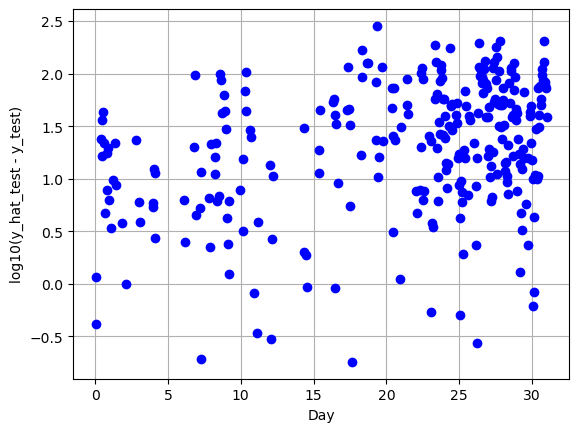

d:\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


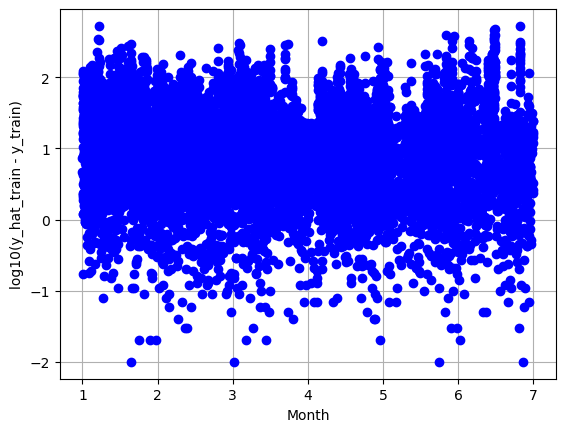

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

pipeline = make_pipeline(StandardScaler(), SelectFromModel(Lasso()), RandomForestRegressor())

pipeline.fit(X_train, y_train) # fit the model on the training data
y_hat_train = pipeline.predict(X_train) # predict training data

y_hat_test = pipeline.predict(X_test) # predict test data

R_train = pipeline.score(X_train, y_train) # Training set R²
R_test = pipeline.score(X_test, y_test) # Test set R²

best_features = X_train.columns[pipeline.named_steps['selectfrommodel'].get_support()]

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print('Best features: {}'.format(best_features))

plot_diff(y_train, y_hat_train, y_test, y_hat_test)

save_predictions("RFReg", test_data, y_hat_test)

### Gradient Boosting Regression

#### sklearn

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

GBReg = make_pipeline(StandardScaler(), SelectFromModel(Lasso()), GradientBoostingRegressor(max_depth=6))

GBReg.fit(X_train, y_train)

y_hat_train = GBReg.predict(X_train) # predict training data

y_hat_test = GBReg.predict(X_test) # predict test data

R_train = GBReg.score(X_train, y_train) # Training set R²
R_test = GBReg.score(X_test, y_test) # Test set R²

best_features = X_train.columns[GBReg.named_steps['selectfrommodel'].get_support()]

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print('Best features: {}'.format(best_features))

save_predictions("GBReg", test_data, y_hat_test)

Train set R²: 0.9117191714476496
Test set R²: 0.8414956989677465
Best features: Index(['apparent_temperature', 'precipitation', 'weathercode', 'cloudcover',
       'is_day', 'hour', 'hour_sin', 'is_school_hours', 'is_weekend',
       'is_public_holiday', 'is_bridge_day', 'is_school_holiday', 'Friday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Fall', 'Summer',
       'Winter'],
      dtype='object')


In [129]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

HGBReg = make_pipeline(StandardScaler(), SelectFromModel(Lasso()), HistGradientBoostingRegressor())

HGBReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = HGBReg.predict(X_train) # predict training data

y_hat_test = HGBReg.predict(X_test) # predict test data

R_train = HGBReg.score(X_train, y_train) # Training set R²
R_test = HGBReg.score(X_test, y_test) # Test set R²

best_features = X_train.columns[GBReg.named_steps['selectfrommodel'].get_support()]

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print('Best features: {}'.format(best_features))

save_predictions("HGBReg", test_data, y_hat_test)

Train set R²: 0.9105095861957132
Test set R²: 0.8430924805999285
Best features: Index(['apparent_temperature', 'precipitation', 'weathercode', 'cloudcover',
       'is_day', 'hour', 'hour_sin', 'is_school_hours', 'is_weekend',
       'is_public_holiday', 'is_bridge_day', 'is_school_holiday', 'Friday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Fall', 'Summer',
       'Winter'],
      dtype='object')


#### XGBoost

In [90]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

def objective(space):
    reg=xgb.XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    reg.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = reg.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    return {'loss': -accuracy, 'status': STATUS_OK }

space={'max_depth': hp.quniform("max_depth", 1, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  1%|          | 1/100 [00:00<00:26,  3.71trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

  5%|▌         | 5/100 [00:00<00:10,  9.00trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

  7%|▋         | 7/100 [00:00<00:09,  9.51trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 11%|█         | 11/100 [00:01<00:08, 10.70trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 13%|█▎        | 13/100 [00:01<00:07, 11.07trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-wi

 17%|█▋        | 17/100 [00:01<00:07, 11.23trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 19%|█▉        | 19/100 [00:01<00:07, 11.16trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 21%|██        | 21/100 [00:02<00:07, 10.56trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 25%|██▌       | 25/100 [00:02<00:07,  9.84trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 27%|██▋       | 27/100 [00:02<00:07,  9.52trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 29%|██▉       | 29/100 [00:02<00:07,  9.26trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 31%|███       | 31/100 [00:03<00:07,  9.00trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 33%|███▎      | 33/100 [00:03<00:07,  8.81trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 35%|███▌      | 35/100 [00:03<00:07,  8.98trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 36%|███▌      | 36/100 [00:03<00:07,  8.90trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 39%|███▉      | 39/100 [00:04<00:07,  8.26trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 41%|████      | 41/100 [00:04<00:06,  8.60trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 43%|████▎     | 43/100 [00:04<00:06,  8.80trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 45%|████▌     | 45/100 [00:04<00:06,  8.80trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 47%|████▋     | 47/100 [00:05<00:06,  8.51trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 49%|████▉     | 49/100 [00:05<00:06,  8.45trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 51%|█████     | 51/100 [00:05<00:05,  8.49trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 53%|█████▎    | 53/100 [00:05<00:05,  8.41trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 55%|█████▌    | 55/100 [00:05<00:05,  8.42trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 57%|█████▋    | 57/100 [00:06<00:05,  8.39trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 59%|█████▉    | 59/100 [00:06<00:04,  8.48trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-wi

 60%|██████    | 60/100 [00:06<00:04,  8.65trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 63%|██████▎   | 63/100 [00:06<00:04,  8.28trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 64%|██████▍   | 64/100 [00:07<00:04,  8.11trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 67%|██████▋   | 67/100 [00:07<00:04,  8.23trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-wi

 69%|██████▉   | 69/100 [00:07<00:03,  8.08trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 70%|███████   | 70/100 [00:07<00:04,  6.14trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 73%|███████▎  | 73/100 [00:08<00:03,  7.39trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 74%|███████▍  | 74/100 [00:08<00:03,  7.55trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 77%|███████▋  | 77/100 [00:08<00:02,  8.08trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 79%|███████▉  | 79/100 [00:09<00:02,  8.21trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 81%|████████  | 81/100 [00:09<00:02,  8.06trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 83%|████████▎ | 83/100 [00:09<00:02,  8.10trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 85%|████████▌ | 85/100 [00:09<00:01,  8.22trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 87%|████████▋ | 87/100 [00:10<00:01,  8.19trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 89%|████████▉ | 89/100 [00:10<00:01,  8.29trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 91%|█████████ | 91/100 [00:10<00:01,  8.46trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 93%|█████████▎| 93/100 [00:10<00:00,  8.41trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 95%|█████████▌| 95/100 [00:10<00:00,  8.43trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 97%|█████████▋| 97/100 [00:11<00:00,  8.76trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

 99%|█████████▉| 99/100 [00:11<00:00,  8.76trial/s, best loss: -0.0]

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`se

100%|██████████| 100/100 [00:11<00:00,  8.68trial/s, best loss: -0.0]


d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



The best hyperparameters are :  

{'colsample_bytree': 0.6175212892956825, 'gamma': 7.4679336277321955, 'max_depth': 13.0, 'min_child_weight': 4.0, 'reg_alpha': 98.0, 'reg_lambda': 0.0732412871478697}
Train set R²: 0.9480231240710562
Test set R²: 0.8043041615479204


d:\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


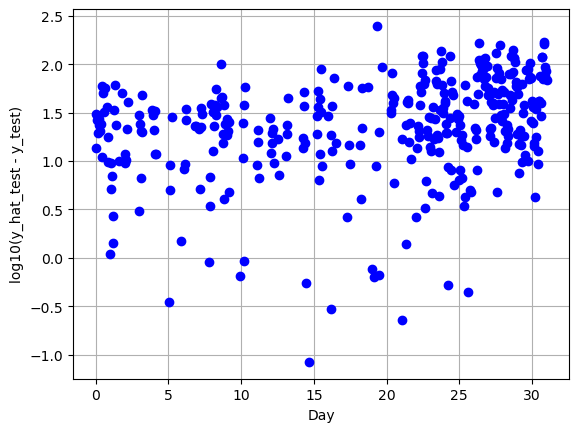

d:\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


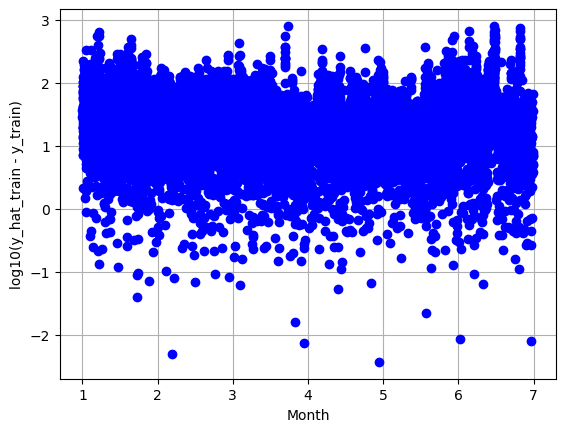

In [91]:
import xgboost as xgb
from sklearn.metrics import r2_score

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

best_hyperparams["max_depth"] = int(best_hyperparams["max_depth"])

dmatrix = xgb.DMatrix(X_train, label=y_train)

XGBReg =  xgb.train(best_hyperparams, dmatrix)

y_hat_train = XGBReg.predict(xgb.DMatrix(X_train))
y_hat_test = XGBReg.predict(xgb.DMatrix(X_test))

R_train = r2_score(y_train, y_hat_train) # Training set R²
R_test = r2_score(y_test, y_hat_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

plot_diff(y_train, y_hat_train, y_test, y_hat_test)